# Le langage SQL
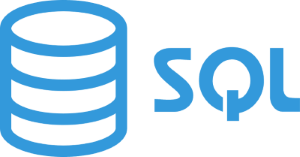
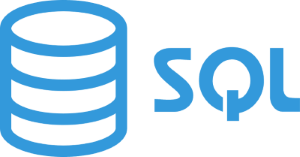

---
## Introduction

Maintenant que nous avons défini les **données**, vu comment étaient organisées les **bases de données** notamment à travers le **modèle relationnel** et enfin comment elles étaient gérées par un **SGBD**, nous allons maintenant étudier les intéractions avec les bases de données. Le programme de terminale préconise pour cela l'étude du langage **SQL** (**S**tructured **Q**uery **L**anguage) pour interroger ou écrire dans une base de données.



## Mise en oeuvre

Commme nous l'avons vu dans le cours précédent, l'utilisation d'une base de données nécessite souvent la mise en place d'un **serveur de base de données** et de l'interroger avec une **application cliente**. Cette mise en oeuvre est complexe et coûteuse en temps ; vue la durée de notre travail sur le SQL, nous n'utiliseront pas une telle architecture.  

Il existe cependant d'autres moyens pour travailler sur une BDD plus simplement :
- Installer et utiliser le SGBD **SQLite** qui permet de manipuler localement des bases de données sans passer par un serveur. Par exemple en utilisant _DB Browser for SQLite_ téléchargeable à l'adresse https://sqlitebrowser.org
- Utiliser **SQLite** en ligne sur le site https://sqliteonline.com
- Utiliser le **noyau SQL de Basthon** et passer des requêtes directement dans son notebook. C'est la solution que nous allons privilégier dans ce cours.

> ⚠️ Lors de l'utilisation d'un notebook SQL, assurez vous de l'avoir ouvert avec le bon noyau :
> - Soit en vérifiant que dans l'url, le noyau a été précisé aves la mention `kernel=sql` : `https://notebook.basthon.fr/?kernel=sql&from=https://...`
> - Soit en sélectionnant le noyau SQL dans le menu de Basthon : `Noyau / Changer de noyau > / SQL` et rechargeant le notebook



## Le langage SQL (_Structured Query Language_)

SQL est un langage permettant d’exploiter les bases de données relationnelles. Il permet de rechercher, d’ajouter, de modifier 
ou de supprimer des données. C'est un langage **déclaratif** c’est-à-dire qu’il permet de décrire le résultat escompté, sans décrire la manière de l’obtenir. Les instructions SQL s’écrivent donc d’une manière qui ressemble à celle de phrases ordinaires en anglais. Cette ressemblance voulue vise à faciliter l’apprentissage et la lecture.

> 📌 Les **requêtes** sont des instructions qui permettent d'intéragir avec une base de données.
> - Le langage SQL n’est pas sensible à la casse, mais il est préconisé par convention d'écrire les instructions **en majuscules**
> - On peut écrire les instructions sur **plusieurs lignes** avec ou sans indentation (contrairement à Python, SQL n'est pas sensible à l'indentation)
> - Chaque requête doit être obligatoirement terminée par un point-virgule `;`
> - Pour ajouter une ligne de commentaires, il faut la commencer avec deux tirets `--`
> - Pour ajouter plusieurs lignes de commentaire, il faut les encadrer avec `/*` et `*/`
> - Les requêtes sont composées de mots-clés appelés aussi **clauses**


---
## Manipulation des tables

### Création d'une table

Dans l'esprit de notre **Exercice 1** du précédent cours, nous voulons créer la table `agence` suivante :  
| idAgence  | ville       | dept  |
|:---------:|:-----------:|:-----:|
| 1         | Paris       |  75   |
| ...       |          |    |

  Son schéma relationnel est : _agence_ : ($\underline{idAgence}$  : INT, $ville$ : TEXT, $dept$ : INT )  
  
  Pour cela, nous utiliserons le mot clé `CREATE TABLE` :

In [1]:
-- à exécuter
CREATE TABLE AGENCE (
    idAgence INTEGER,
    ville TEXT,
    dept INTEGER,
    PRIMARY KEY (idAgence)
) ;

  Revenons sur cette première requête :
  `CREATE TABLE AGENCE` crée une **nouvelle table** nommée "_AGENCE_". Les attributs sont décrits dans la parenthèse et pour chaque attribut, il faut préciser son **domaine** :
- idAgence : entier (INTEGER)
- ville : chaîne de caractères (TEXT) 
- dept : entier (INTEGER)  

 L'attribut _idAgence_ va jouer ici le rôle de **clé primaire**, nous l'avons donc précisé dans notre requête avec la dernière ligne  (`PRIMARY KEY (idAgence)`.  

  Aucun résultat n'apparait mais vous venez de créer votre première table , il est possible de vérifier le résultat en affichant la liste des tables avec la commande SQLLite `.tables` :

In [2]:
.tables

name
AGENCE


---
#### 💻 EXERCICE 1
> - Créez à présent la table `marque` suivante :  
> | idMarque  | nom       | pays  |
> |:---------:|:---------:|:-----:|
> | 1         | Renault   |  FR   |
> | ...       |        |    |
>
>   Son schéma relationnel est : _marque_ : ($\underline{idMarque}$ : INT, $nom$ : TEXT, $pays$ : TEXT )

In [3]:
-- à compléter


In [4]:
.tables

name
AGENCE
MARQUE


Nous allons maintenant créer la table `voiture`, celle-ci contient deux clés étrangères (_idAgence_ et _idMarque_)
| idVoiture   | modele    | couleur  | km       | idAgence  | idMarque |
|:-----------:|:---------:|:--------:|:--------:|:---------:|:--------:|
| 1           | Clio      | Bleu     | 92000    |  1        |  1       |
| ...           |       |      |      |          |         |


  Son schéma relationnel est : _voiture_ : ( $\underline{idVoiture}$ : INT, $modele$ : TEXT, $couleur$ : TEXT, $km$ : INT, $\#idAgence$ : INT , $\#idMarque$ : INT )

In [5]:
-- à exécuter
CREATE TABLE VOITURE (
    idvoiture INTEGER,
    modele TEXT,
    couleur TEXT,
    km INTEGER,
    idAgence INTEGER,
    idMarque INTEGER,
    PRIMARY KEY (idvoiture),
    FOREIGN KEY (idAgence) REFERENCES AGENCE(idAgence),
    FOREIGN KEY (idMarque) REFERENCES MARQUE(idMarque)    
) ;

  Ici, les deux dernières lignes  (`FOREIGN KEY (idAgence) REFERENCES AGENCE(idAgence)` et `FOREIGN KEY (idMarque) REFERENCES MARQUE(idMarque)` signifient que les attributs _idAgence_ et _idMarque_ sont de clés étrangères et précisent les tables et nom d'attributs auxquels elles font référence ( `AGENCE(idAgence)` et `MARQUE(idMarque)` ).

In [6]:
.tables

name
AGENCE
MARQUE
VOITURE


### Suppression d'une table

Pour supprimer une table, il faut utiliser le mot clé `DROP TABLE` : 

In [7]:
-- à exécuter
DROP TABLE VOITURE ;

In [8]:
.tables

name
AGENCE
MARQUE


> ⚠️ **Ré-exécutons la création de la table `voiture` pour retrouver notre table**

In [9]:
-- à exécuter
CREATE TABLE VOITURE (
    idvoiture INTEGER,
    modele TEXT,
    couleur TEXT,
    km INTEGER,
    idAgence INTEGER,
    idMarque INTEGER,
    PRIMARY KEY (idvoiture),
    FOREIGN KEY (idAgence) REFERENCES AGENCE(idAgence),
    FOREIGN KEY (idMarque) REFERENCES MARQUE(idMarque)    
) ;

---
## Ajout d'enregistrements
Commençons par un exemple :

In [10]:
-- à exécuter
INSERT INTO AGENCE VALUES (1,"Paris",75) ;

Vérifions maintenant le contenu de la table `agence` :  
💡 _Note : La requête suivante affiche le contenu de la table, nous reviendrons en détails sur celle-ci un peu plus loin dans le cours_ 

In [11]:
-- Vérification
SELECT * FROM AGENCE ;

idAgence,ville,dept
1,Paris,75


L'ajout de valeurs dans une table est fait par le mot clé `INSERT INTO ... VALUES (...) ;` où il faudra préciser le nom de la table dans laquelle on ajoute les données, puis les valeurs de chacun des attributs.  
  Chaque requête de ce type ajoutera **un enregistrement** dans la table, il faudra donc la répéter pour plusieurs enregistrements.  
>⚠️ Lors de la saisie des valeurs, il est primordial de respecter le **domaine** de chacun des attributs sous peine de violer une **contrainte d'intégrité** de la base (contrainte de domaine).
>
>⚠️ Il faut également s'assurer que la valeur de la **clé primaire** n'existe pas déjà sous peine de violer une autre **contrainte d'intégrité** de la base (contrainte d'unicité) :
>
> _Exemple :_


In [12]:
-- à exécuter
INSERT INTO AGENCE VALUES (1,"Bordeaux",33) ;

Error: UNIQUE constraint failed: AGENCE.idAgence

---
#### 💻 EXERCICE 2
> - Ajoutez maintenant toutes les données des tables `agence`, `marque` décrites ci-dessous :
>
>  Table `agence` :
>| idAgence  | ville       | dept  |
>|:---------:|:-----------:|:-----:|
>| 1         | Paris       |  75   |
>| 2         | Lyon        |  69   |
>| 3         | Marseille   |  13   |
>| 4         | Clermont-Fd |  63   |
>| 5         | Cournon     |  63   |  
>
>  Table `marque` :
> | idMarque  | nom       | Pays  |
> |:---------:|:---------:|:-----:|
> | 1         | Renault   |  FR   |
> | 2         | Peugeot   |  FR   |
> | 3         | Porsche   |  DE   |

In [ ]:
-- à compléter
-- Ajout de données dans la table AGENCE


In [ ]:
-- Vérification
SELECT * FROM AGENCE ;

In [ ]:
-- à compléter
-- Ajout de données dans la table MARQUE


In [ ]:
-- Vérification
SELECT * FROM MARQUE ;

---
#### 💻 EXERCICE 3
> - Ajoutez maintenant toutes les données de la table `voiture` décrite ci-dessous :
>
> Table `voiture` :
>| idVoiture   | modele    | couleur  | km       | idAgence  | idMarque |
>|:-----------:|:---------:|:--------:|:--------:|:---------:|:--------:|
>| 1           | Clio      | Bleu     | 92000    |  1        |  1       |
>| 2           | 3008      | Gris     | 2000     |  4        |  2       |
>| 3           | Cayenne   | Noir     | 500      |  4        |  3       |
>| 4           | Megane    | Rouge    | 110000   |  2        |  1       |
>| 5           | Clio      | Vert     | 100      |  2        |  1       |
>

In [ ]:
-- à compléter
-- Ajout de données dans la table VOITURE


In [ ]:
-- Vérification
SELECT * FROM VOITURE ;

> ⚠️ Lors de la saisie des valeurs, il est primordial de vérifier que les valeurs des **clés étrangères** existent bien dans les tables sources sous peine de violer une **contrainte d'intégrité** de la base (contrainte d’intégrité référentielle). C'est pour cela qu'il faut remplir les tables contenant les valeurs de ces clés étrangères avant.  
>
> _Exemple :_

In [ ]:
-- à exécuter
INSERT INTO VOITURE VALUES (6,"Juke","Noir",200,1,4) ;

---
## Recherche de données sur une table

### Recherche simple
La recherche sur une table s'effectue à l'aide du mot clé `SELECT` suivi de la liste des attributs recherchés puis le mot clé `FROM` suivi du nom de la table concernée :

In [ ]:
-- à exécuter
SELECT modele,couleur FROM VOITURE ;

Il est possible d'afficher tous les attributs à l'aide du caractère joker `*` :

In [ ]:
-- à exécuter
SELECT * FROM VOITURE ;

---
#### 💻 EXERCICE 4
> - Affichez le département puis la ville des données de la table `agence`

In [ ]:
-- à compléter


> - Affichez maintenant tous les attributs des données de la table `marque`

In [ ]:
-- à compléter


Il est possible de renommer les attributs (pour l'affichage uniquement) avec le mot clé `AS` on dit qu'un **alias** est donné aux colonnes :

In [ ]:
-- à exécuter
SELECT modele AS Nom, couleur AS Teinte FROM VOITURE ;

### Ordonner les résultats
L'ordre d'affichage des enregistrements peut être choisi à l'aide du mot clé `ORDER BY` et suivi de `ASC` (par défaut si rien de précisé) pour un tri **croissant** et `DESC` pour un tri **décroissant** :

In [ ]:
-- à exécuter
SELECT dept, ville from AGENCE ORDER BY dept ASC ;

In [ ]:
-- à exécuter
SELECT dept, ville from AGENCE ORDER BY dept DESC ;

In [ ]:
-- à exécuter
SELECT dept, ville from AGENCE ORDER BY dept ;

Le tri peut être fait même si l'attribut n'est pas affiché :

In [ ]:
-- à exécuter
SELECT ville from AGENCE ORDER BY dept ;

---
#### 💻 EXERCICE 5
> - Affichez les modeles et kilométrage des enregistrements  table `voiture` triés par kilométrage décroissant

In [ ]:
-- à compléter


### Limiter les résultats
Le mot clé `LIMIT` (suivi d'un nombre) permet de limiter le nombre de résultats affichés

In [ ]:
-- à exécuter
SELECT ville FROM AGENCE ORDER BY ville DESC LIMIT 2 ;

Renvoie les deux dernières villes par ordre alphabétique

### Restriction, requêtes conditionnelles
Jusqu'ici, nous avons affiché tous les enregistrements de chaque table, mais il est possible de restreindre la recherche, pour cela le mot clé `WHERE` est utilisé suivi d'une condition booléenne (qui renvoie vrai ou faux).  

_Exemple : Afficher les agences dont l'attribut _dept_ vaut 63 :_

In [ ]:
-- à exécuter
SELECT * from AGENCE WHERE dept = 63 ;

La clause `WHERE` est cumulable avec le tri :

In [ ]:
-- à exécuter
SELECT * from AGENCE WHERE dept = 63 ORDER BY ville DESC ;

La sélection peut se faire sur  plusieurs critères à l’aide : 
- Des opérateurs de comparaison : `<`, `>`, `=`, `<=`, `>=`, `<>`
- Des opérateurs logiques : `AND`, `OR`, `NOT`
- Des opérateurs : `IN` (appartenance), `BETWEEN ... AND ...` (intervalle bornes incluses), `NULL` (valeur vide)

In [ ]:
-- à exécuter
SELECT * from VOITURE WHERE modele = "Clio" AND couleur = "Vert" ;

In [ ]:
-- à exécuter
SELECT * from VOITURE WHERE NOT (modele = "Clio") ;

In [ ]:
-- à exécuter
SELECT * from VOITURE WHERE modele IN ("Clio","3008") ;

In [ ]:
-- à exécuter
SELECT * from VOITURE WHERE km BETWEEN 500 AND 100000 ;

---
#### 💻 EXERCICE 6
> - Affichez les modèles, couleur et kilométrage des enregistrements  table `voiture` dont le kilométrage est inférieur à 5000 km triés par ordre de kilométrage croissant

In [ ]:
-- à compléter


### Gestion des doublons

Si le résultat d'une requête renvoie plusieurs fois la même ligne, il est possible de supprimer les doublons avec le mot clé `DISTINCT` : 

In [ ]:
-- à exécuter
SELECT modele from VOITURE ;

In [ ]:
-- à exécuter
SELECT DISTINCT(modele) from VOITURE ;

### Valeur approchée
Le mot clé `LIKE` permet de faire une recherche sur une valeur incomplète :

In [ ]:
-- à exécuter
SELECT * FROM VOITURE WHERE modele LIKE "%yenne%" ;

Le symbole `%` est un joker qui peut symboliser n'importe quelle chaîne de caractères, ici nous avons mis le caractère avant et après la chaine "yenne" ce qui signifiera **"contient 'yenne' "**.  
Pour afficher les villes commençant par un "C" il suffira de saisir : 

In [ ]:
-- à exécuter
SELECT ville FROM AGENCE WHERE ville LIKE "C%" ;

---
#### 💻 EXERCICE 7
> - Affichez les enregistrements table `voiture` dont le modele se termine par un `e`

In [ ]:
-- à compléter


### Agrégation de données
Il est possible d'agréger (regrouper) les données et d'effectuer un calcul sur le regroupement :

In [ ]:
-- à exécuter
SELECT * FROM VOITURE ;

On pourra compter les enregistrement avec le mot clé `COUNT`

In [ ]:
-- à exécuter
SELECT COUNT(*) FROM VOITURE ;

Le nom de la colonne peut être renommé avec le mot clé `AS` vu précédemment et les données peuvent être restreintes avec `WHERE`

In [ ]:
-- à exécuter
SELECT COUNT(*) AS "NB CLIO" FROM VOITURE WHERE modele = "Clio" ;

Il est possible d'effectuer une somme avec le mot clé `SUM`, les lignes :

In [ ]:
-- à exécuter
SELECT * FROM VOITURE WHERE modele = "Clio" ;

Pourront être agrégées en effectuant la somme des kilométrages avec :

In [ ]:
-- à exécuter
SELECT SUM(km) as "Nb km Clio" FROM VOITURE WHERE modele = "Clio" ;

Il est possible de calculer une moyenne avec le mot clé `AVG`

In [ ]:
-- à exécuter
SELECT AVG(km) as "Moy km Clio" FROM VOITURE WHERE modele = "Clio" ;

Il est possible de trouver des extremums avec les mots clés `MIN` et `MAX`

In [ ]:
-- à exécuter
SELECT modele, MIN(km) FROM VOITURE ;

In [ ]:
-- à exécuter
SELECT modele, MAX(km) FROM VOITURE ;

Sans passer par une clause `WHERE`, les données peuvent être regroupées par attributs pour des calculs avec le mot clé `GROUP BY`

In [ ]:
-- à exécuter
SELECT modele, SUM(km) as "Nb km" FROM VOITURE GROUP BY modele ;

Et le résultat peut-être restreint à l'aide du mot clé `HAVING`

In [ ]:
-- à exécuter
SELECT modele, SUM(km) as "Nb km" FROM VOITURE GROUP BY modele HAVING modele like "%e" ;

---
#### 💻 EXERCICE 8
> - Calculez la somme des kilométrages des éléments de la table `voiture` dont l'attribut _idAgence_ vaut 4

In [ ]:
-- à compléter


## Recherche croisée sur plusieurs tables : les jointures

Pour faciliter le traitement des données, nous les avons séparées en plusieurs tables, mais pour la lisibilité la recherche avec un `SELECT` ne sera pas toujours très facile :

In [ ]:
-- à exécuter
SELECT * FROM VOITURE ;

Si je vous demande "_Quelle est la marque de l'enregistrement dont le modèle est `Cayenne` ?_" Vous devrez dans un premier temps retrouver l'enregistrement concerné :

In [ ]:
-- à exécuter
SELECT * FROM VOITURE WHERE modele = "Cayenne" ;

A la lecture du résultat, nous savons que la marque est celle de la table `marque` donc la clé primaire _idMarque_ vaut `3`. Il faudra donc utiliser une seconde requête pour trouver son nom :

In [ ]:
-- à exécuter
SELECT NOM FROM MARQUE WHERE idMarque = 3 ;

Nous pouvons maintenant conclure en répondant "_Porsche_"...  
Les deux requêtes nous ayant permis de retrouver l'information peuvent être combinées par ce qu'on appelle une **jointure**  effectuée à l'aide du mot clé `JOIN`.  

Affichons le modèle, la marque, la couleur et le kilométrage de notre véhicule : 

In [ ]:
-- à exécuter
SELECT
    MARQUE.nom, VOITURE.modele, VOITURE.couleur, VOITURE.km
FROM
    VOITURE
JOIN 
    MARQUE
ON
    VOITURE.idMarque = MARQUE.idMarque
WHERE
    VOITURE.modele = "Cayenne" ;

- Lorsque les requêtes deviennent complexes, il est de rigueur d'**indenter le code**, ceci permettra une bien meilleure visibilité et évitera les erreurs
- Comme nous affichons des données de plusieurs tables, vous noterez que nous avons **préfixé** chaque attribut par la table concernée pour éviter les confusions
- L'expression `JOIN MARQUE ON VOITURE.idMarque = MARQUE.idMarque` signifie qu'en plus des données de notre table `voiture`, nous allons afficher des données de la table `marque` (ici l'attribut _nom_) et nous précisons la correspondance entre les deux tables (clé étrangère table 1 = clé primaire table 2)
- Comme vous pouvez le voir, nous avons filtré les données avec une clause `WHERE`  

Il est cependant possible d'afficher touts les croisements entre les deux tables en supprimant la clause `WHERE` :

In [ ]:
-- à exécuter
SELECT
    MARQUE.nom, VOITURE.modele, VOITURE.couleur, VOITURE.km
FROM
    VOITURE
JOIN
    MARQUE
ON
    VOITURE.idMarque = MARQUE.idMarque ;

Il est possible d'utiliser les jointures sur plus de deux tables, et nous pourrons ainsi ajouter la ville de l'agence de chaque véhicule :

In [ ]:
-- à exécuter
SELECT
    MARQUE.nom, VOITURE.modele, VOITURE.couleur, VOITURE.km, AGENCE.ville
FROM
    VOITURE
JOIN
    MARQUE
ON
    VOITURE.idMarque = MARQUE.idMarque
JOIN
    AGENCE
ON
    VOITURE.idAgence = AGENCE.idAgence ;

Enfin, il est possible d'utiliser des **alias** sur les tables pour faciliter la lecture. Profitons-en également renommer les colonnes et avoir un affichage soigné:

In [ ]:
-- à exécuter
SELECT
    M.nom AS Marque, V.modele AS Modèle,  V.couleur AS Couleur, V.km AS Kilométrage, A.ville AS Agence
FROM
    VOITURE AS V
JOIN
    MARQUE AS M
ON
    V.idMarque = M.idMarque
JOIN 
    AGENCE AS A
ON
    V.idAgence = A.idAgence ;

---
#### 💻 EXERCICE 9
> - Affichez maintenant le n° d'agence, le département, la marque puis le modele de chaque véhicule de la table `voiture` en utilisant des jointures avec les tables `agence` et `marque`. Vous veillerez à utiliser des noms de colonnes soignés.

In [ ]:
-- à compléter


## Suppression d'enregistrements

La suppression d'enregistrements dans une table se fait à l'aide du mot clé `DELETE`. Celui- ci est compatible avec le mot clé `WHERE` (c'est recommandé pour limiter les enregistrements à supprimer).

  La requête suivante supprimera tous les enregistrements de la table `voiture` dont l'attribut _modele_ vaut "Clio" :

In [ ]:
-- à exécuter
DELETE FROM VOITURE WHERE modele = "Clio" ;

In [ ]:
-- Vérification
SELECT * FROM VOITURE ;

⚠️ Si les éléments à supprimer contiennent une valeur qui est une **clé étrangère** dans un enregistrement d'une autre table,  le SGBD refusera de supprimer cette ligne, afin de ne pas violer la **contrainte d'intégrité référencielle**.

In [ ]:
-- à exécuter
DELETE FROM AGENCE WHERE idAgence = 4 ;

---
#### 💻 EXERCICE 10
> - Supprimez les éléments de la table `voiture` dont l'attribut _modele_ contient "gan"

In [ ]:
-- à compléter


In [ ]:
-- Vérification
SELECT * FROM VOITURE ;

Si aucun critère n'est passé, tous les enregistrements de la table seront supprimés :

In [ ]:
-- à exécuter
DELETE FROM voiture ;

In [ ]:
-- Vérification
SELECT * FROM VOITURE ;

## Modification d'enregistrements

La modification d'enregistrements dans une table se fait à l'aide du mot clé `UPDATE ... SET ...`. Celui- ci est compatible avec le mot clé `WHERE` (c'est recommandé pour limiter les enregistrements à modifier).

  La requête suivante enregistrera la valeur "Martigues" dans l'attribut _ville_ des enregistrements de la table `agence` dont l'attribut _dept_ vaut 13 :

In [ ]:
-- à exécuter
UPDATE AGENCE SET ville = "Martigues" WHERE dept = 13 ;

In [ ]:
-- Vérification
SELECT * from agence;

---
#### 💻 EXERCICE 11
> - Renommez le nom de l'enregistrement de la table `marque` dont l'attribut _nom_ vaut "Renault" en "Renault / Nissan"

In [ ]:
-- à compléter


In [ ]:
-- Vérification
SELECT * FROM MARQUE

!!! success Langage SQL : résumé

**Ce qu’il faut savoir**
- Le langage SQL est un langage **déclaratif** et ses instructions sont appelées **requêtes**
- Connaître les **mots clés** du langage (`SELECT`, `FROM`, `WHERE`, `UPDATE`...)


**Ce qu’il faut savoir faire**
- Être capable d’effectuer des **requêtes SQL simples** avec l'utilisation de `INSERT`, `SELECT`, `UPDATE` et `DELETE` et des clauses `WHERE`
- Être capable d’effectuer une **jointure** entre 2 tables avec l'utilisation de `JOIN`
!!!